# Predictions of the first innings score of the IPL matches using the previous seasons dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.linear_model import ElasticNet

In [5]:
try:
    import cPickle as pickle
except:
    %pip install pickle-mixin

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pickle
import datetime

In [7]:
data = pd.read_csv('/Users/rounaksarkar/Desktop/ML:AI/1. Data Analysis Projects/project11/datasets/ipl_all_seasons_dataset_assembled.csv')

In [8]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [9]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [10]:
data.shape

(76014, 15)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [12]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [13]:
data.isnull()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76010,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76011,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76012,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

### Removing Unwanted Columns

In [15]:
columns_to_drop= ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
data.drop(labels= columns_to_drop, axis= 1, inplace= True)

In [16]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

### Keeping the consistents teams only

In [17]:
consistent_teams= ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', 'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad']

In [18]:
df= data[(data['bat_team'].isin(consistent_teams)) & (data['bowl_team'].isin(consistent_teams))]

In [19]:
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


### Removing the first 5 overs data

In [20]:
df= df[df['overs']>=5.0]

In [21]:
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [22]:
print (df['bat_team'].unique())
print (df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [23]:
df['date']= df['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

/var/folders/wp/b7j3byf17pn145my75d2hfth0000gn/T/ipykernel_65707/841498775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']= df['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))


In [24]:
df['date']

32      2008-04-18
33      2008-04-18
34      2008-04-18
35      2008-04-18
36      2008-04-18
           ...    
75884   2017-05-19
75885   2017-05-19
75886   2017-05-19
75887   2017-05-19
75888   2017-05-19
Name: date, Length: 40108, dtype: datetime64[ns]

### Data preprocesssing

bat_teama and bowl_team are categorical features. We need to convert them into one hot encoded values.

In [25]:
encoded_df= pd.get_dummies(data= df, columns= ['bat_team', 'bowl_team'])

In [26]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Rearranging the columns

In [27]:
encoded_df= encoded_df[['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 
'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab', 
'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals', 
'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders', 
'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore', 
'bowl_team_Sunrisers Hyderabad', 'overs', 'runs_last_5', 'wickets_last_5', 'total']]

### Splitting the dataset into train and test set

In [28]:
X_train= encoded_df.drop(labels= 'total', axis= 1)[encoded_df['date'].dt.year <= 2016]
X_test= encoded_df.drop(labels= 'total', axis= 1)[encoded_df['date'].dt.year >= 2017]

In [29]:
y_train= encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test= encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

### Removing the 'date' column

In [30]:
X_train.drop(labels= 'date', axis= True, inplace= True)
X_test.drop(labels= 'date', axis= True, inplace= True)

## Model Building

### Linear Regression

In [31]:
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Ridge Regression

In [33]:
ridge= Ridge()
parameters= {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor= GridSearchCV(ridge, parameters, scoring= 'neg_mean_squared_error', cv= 5)
ridge_regressor.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.28719e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [34]:
print (ridge_regressor.best_params_)

{'alpha': 100}


In [35]:
print (ridge_regressor.best_score_)

-328.00148348964524


In [36]:
print (ridge_regressor.best_estimator_)

Ridge(alpha=100)


In [37]:
print (ridge_regressor.best_index_)

15


In [38]:
print (ridge_regressor.cv_results_)

{'mean_fit_time': array([0.27691956, 0.27137918, 0.03092551, 0.00808768, 0.00773892,
       0.00824294, 0.00665455, 0.00942125, 0.00939655, 0.00983758,
       0.00821123, 0.00823178, 0.00845571, 0.00763345, 0.01097898,
       0.00674372]), 'std_fit_time': array([0.07947303, 0.09554474, 0.01570381, 0.00238289, 0.00439565,
       0.00203029, 0.00138191, 0.0025762 , 0.00412002, 0.00274898,
       0.00355352, 0.00293642, 0.00239473, 0.00189111, 0.00486298,
       0.00273124]), 'mean_score_time': array([0.02735462, 0.03015742, 0.01269302, 0.00172429, 0.00108819,
       0.0014327 , 0.00256286, 0.00299931, 0.00262442, 0.00180297,
       0.00652151, 0.00367236, 0.00119843, 0.00164084, 0.00194459,
       0.00243444]), 'std_score_time': array([0.01365292, 0.01067117, 0.00988884, 0.00131842, 0.00059982,
       0.00068794, 0.00205935, 0.00116039, 0.0016296 , 0.0016311 ,
       0.01155729, 0.00325173, 0.00074833, 0.00060688, 0.00100214,
       0.00276013]), 'param_alpha': masked_array(data=[1e-15, 

In [39]:
print (ridge_regressor.scorer_)

make_scorer(mean_squared_error, greater_is_better=False)


In [40]:
print (ridge_regressor.n_splits_)

5


In [41]:
prediction= ridge_regressor.predict(X_test)

/var/folders/wp/b7j3byf17pn145my75d2hfth0000gn/T/ipykernel_65707/1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: ylabel='Density'>

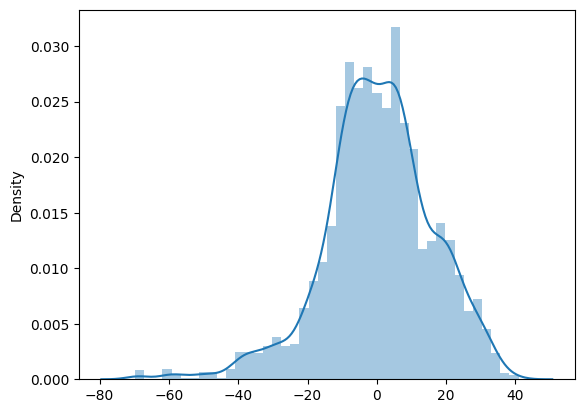

In [42]:
sns.distplot(y_test-prediction)

In [43]:
print ("The Mean Absolute Error: ", metrics.mean_absolute_error(y_test, prediction))
print ("The Mean Squared Error: ", metrics.mean_squared_error(y_test, prediction))
print ("The Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

The Mean Absolute Error:  12.11544710474626
The Mean Squared Error:  251.0540155181168
The Root Mean Squared Error:  15.844684140686327


## Lasso Regression

In [44]:
lasso= Lasso()
parameters= {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor= GridSearchCV(lasso, parameters, scoring= 'neg_mean_squared_error', cv= 5)
lasso_regressor.fit(X_train, y_train)

print (lasso_regressor.best_params_)
print (lasso_regressor.best_score_)
print (lasso_regressor.best_estimator_)
print (lasso_regressor.best_index_)
print (lasso_regressor.cv_results_)
print (lasso_regressor.scorer_)
print (lasso_regressor.n_splits_)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.572e+06, tolerance: 2.530e+03
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.502e+06, tolerance: 2.547e+03
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.677e+06, toleranc

{'alpha': 1}
-320.8221509295816
Lasso(alpha=1)
5
{'mean_fit_time': array([2.44712057, 2.81268091, 2.4574368 , 1.79428773, 0.60142689,
       0.37531171, 0.36397319, 0.3658442 , 0.33410802, 0.26095605,
       0.27676263, 0.26919756, 0.26754732, 0.26521959, 0.25721107,
       0.26612344]), 'std_fit_time': array([0.26061205, 0.38452797, 0.24652316, 0.59851157, 0.18400965,
       0.01457832, 0.03246552, 0.01531275, 0.03216209, 0.01590517,
       0.02527823, 0.02427166, 0.01841047, 0.03231146, 0.00939241,
       0.01471687]), 'mean_score_time': array([0.04951501, 0.04435005, 0.055685  , 0.03710103, 0.04330401,
       0.02923651, 0.01943798, 0.03702765, 0.02570243, 0.03651233,
       0.02433133, 0.03215108, 0.024189  , 0.04014134, 0.028304  ,
       0.03167324]), 'std_score_time': array([0.0320053 , 0.01594943, 0.02643683, 0.01223558, 0.02832842,
       0.00803292, 0.00414369, 0.02141799, 0.00488246, 0.0140489 ,
       0.00808043, 0.01510952, 0.01331427, 0.02179641, 0.00790393,
       0.0094

In [45]:
prediction= lasso_regressor.predict(X_test)

/var/folders/wp/b7j3byf17pn145my75d2hfth0000gn/T/ipykernel_65707/1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: ylabel='Density'>

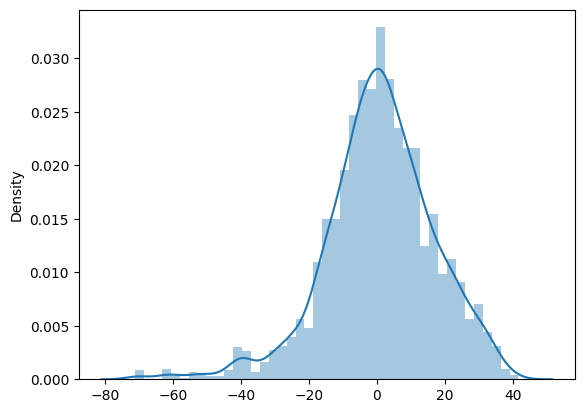

In [46]:
sns.distplot(y_test-prediction)

In [47]:
print ("The Mean Absolute Error: ", metrics.mean_absolute_error(y_test, prediction))
print ("The Mean Squared Error: ", metrics.mean_squared_error(y_test, prediction))
print ("The Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

The Mean Absolute Error:  12.213584286264183
The Mean Squared Error:  262.3654045756553
The Root Mean Squared Error:  16.197697508462593


## Elastic Net Regression

In [48]:
elastic= ElasticNet()
parameters= {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100],}
elastic_regressor= GridSearchCV(elastic, parameters, scoring= 'neg_mean_squared_error', cv= 5)
elastic_regressor.fit(X_train, y_train)

print (elastic_regressor.best_params_)
print (elastic_regressor.best_score_)
print (elastic_regressor.best_estimator_)
print (elastic_regressor.best_index_)
print (elastic_regressor.cv_results_)
print (elastic_regressor.scorer_)
print (elastic_regressor.n_splits_)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.574e+06, tolerance: 2.530e+03
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.503e+06, tolerance: 2.547e+03
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.679e+06, toleranc

{'alpha': 1}
-322.7016187404222
ElasticNet(alpha=1)
5
{'mean_fit_time': array([7.86635327, 5.84749703, 4.98679876, 8.13567538, 2.66266804,
       0.90472403, 0.43534479, 0.31246052, 0.32014842, 0.32512536,
       0.27268991, 0.29060283, 0.26095381, 0.32419181, 0.26797051,
       0.27010078]), 'std_fit_time': array([5.17228311, 5.1238284 , 3.81034445, 5.73224786, 0.63990763,
       0.07455951, 0.06042672, 0.01968344, 0.01019218, 0.04013472,
       0.01151722, 0.04113519, 0.01631448, 0.03961839, 0.02157699,
       0.01852003]), 'mean_score_time': array([0.05151162, 0.04007797, 0.0474154 , 0.03204498, 0.06132135,
       0.0269186 , 0.0541028 , 0.01471796, 0.03224573, 0.02872066,
       0.05420036, 0.03918924, 0.03740463, 0.04237361, 0.04055119,
       0.02894063]), 'std_score_time': array([0.0334844 , 0.02604257, 0.03633039, 0.01318512, 0.03368952,
       0.01867217, 0.04254535, 0.00583852, 0.01553032, 0.01030307,
       0.01720915, 0.02368592, 0.0151647 , 0.02272941, 0.01410807,
       0

In [49]:
prediction= elastic_regressor.predict(X_test)

/var/folders/wp/b7j3byf17pn145my75d2hfth0000gn/T/ipykernel_65707/1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: ylabel='Density'>

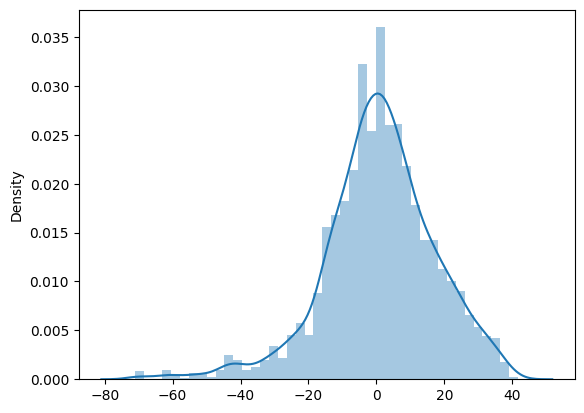

In [50]:
sns.distplot(y_test-prediction)

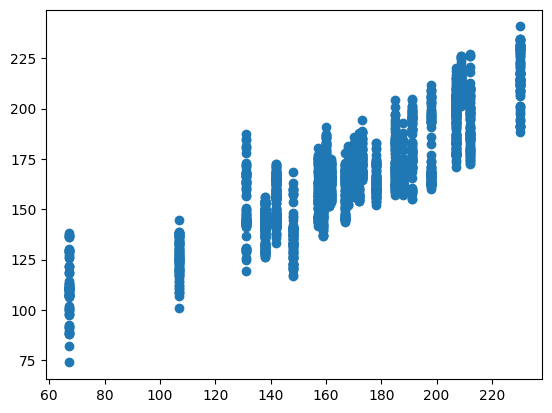

In [51]:
plt.scatter(y_test, prediction)

In [52]:
print ("The Mean Absolute Error: ", metrics.mean_absolute_error(y_test, prediction))
print ("The Mean Squared Error: ", metrics.mean_squared_error(y_test, prediction))
print ("The Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

The Mean Absolute Error:  12.288591971603843
The Mean Squared Error:  268.6642466774015
The Root Mean Squared Error:  16.390980650266215


### Creating a pickle file for the classifier

In [ ]:
filename= 'first-innings-score-lr-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))